In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freg = 'MS'
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df2 = pd.read_csv('DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freg = 'D'
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [9]:
from statsmodels.tsa.stattools import ccovf, ccf
from scipy .signal import periodogram

In [18]:
from statsmodels.tsa.stattools import adfuller, kpss , bds,q_stat,grangercausalitytests,levinson_durbin

In [15]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [22]:
df1['12-month-SMA'] = df1['Thousands of Passengers'].rolling(window=12).mean()
df1['12-month-std'] = df1['Thousands of Passengers'].rolling(window=12).std()

<Axes: xlabel='Month'>

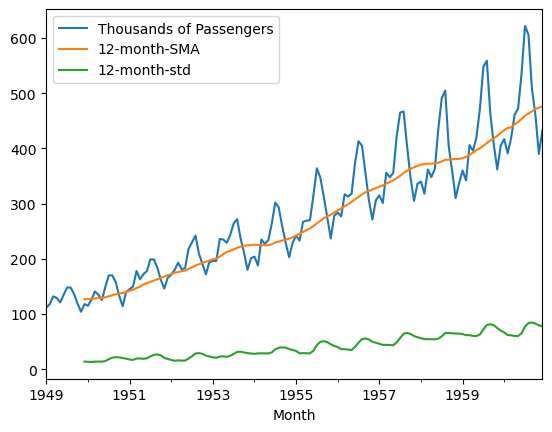

In [23]:
df1[['Thousands of Passengers','12-month-SMA','12-month-std']].plot()

In [24]:
print('Aug')
dftest = adfuller(df1['Thousands of Passengers'], autolag='AIC')
dftest

Aug


(0.8153688792060511,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [25]:
print('Augmented')
dfout = pd.Series(dftest[0:4], index=['ADF test statistic', 'p-value', '# lags used', '# observations'])
for key, val in dftest[4].items():
    dfout[f'critical ({key})'] = val
print(dfout)


Augmented
ADF test statistic      0.815369
p-value                 0.991880
# lags used            13.000000
# observations        130.000000
critical (1%)          -3.481682
critical (5%)          -2.884042
critical (10%)         -2.578770
dtype: float64


In [19]:
df2['12-month-SMA'] = df2['Births'].rolling(window=30).mean()
df2['12-month-std'] = df2['Births'].rolling(window=30).std()

<Axes: xlabel='Date'>

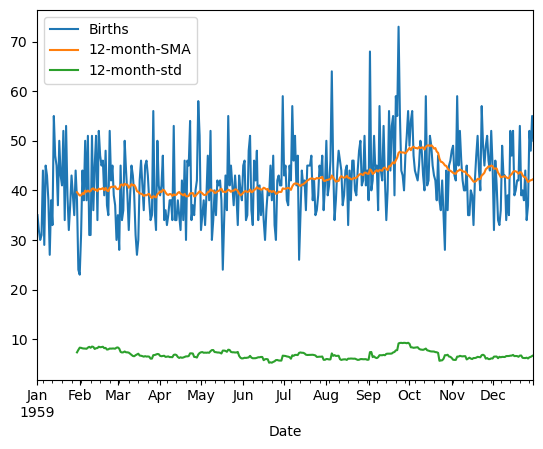

In [20]:
df2[['Births','12-month-SMA','12-month-std']].plot()

In [28]:
print('Aug')
dftest = adfuller(df2['Births'], autolag='AIC')
dftest

Aug


(-4.808291253559765,
 5.2434129901498554e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [29]:
print('Augmented')
dfout = pd.Series(dftest[0:4], index=['ADF test statistic', 'p-value', '# lags used', '# observations'])
for key, val in dftest[4].items():
    dfout[f'critical ({key})'] = val
print(dfout)


Augmented
ADF test statistic     -4.808291
p-value                 0.000052
# lags used             6.000000
# observations        358.000000
critical (1%)          -3.448749
critical (5%)          -2.869647
critical (10%)         -2.571089
dtype: float64
